# CSI assignment 4

# EDA: Students Performance in Exams Dataset


In [27]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
#plt.style.use("fivethirtyeight")
%matplotlib inline

In [28]:
# 2. Load the Dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
# 3. Dataset Overview
print("Dataset Shape:", df.shape)
df.info()
df.describe(include='all')

Dataset Shape: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\543180073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\543180073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\543180073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)
C

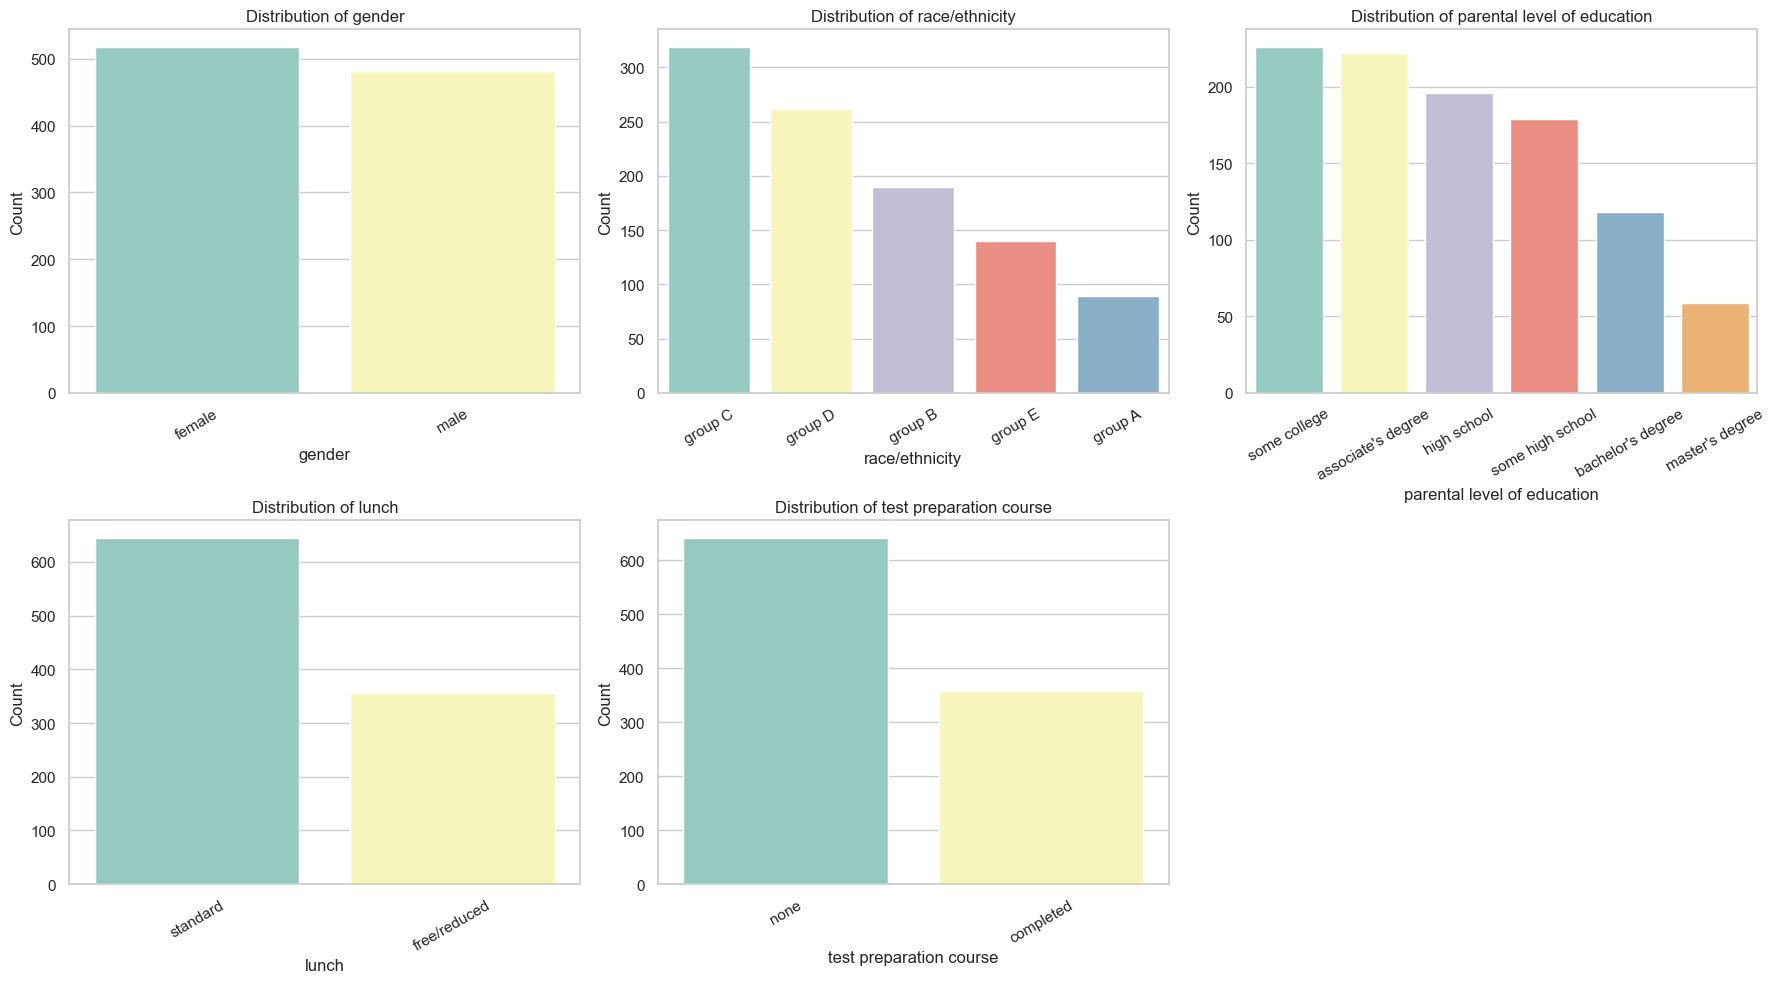

In [30]:
# Define categorical columns
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Set up a 2x3 grid for plots
plt.figure(figsize=(18, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, palette='Set3', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


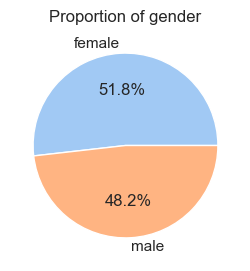

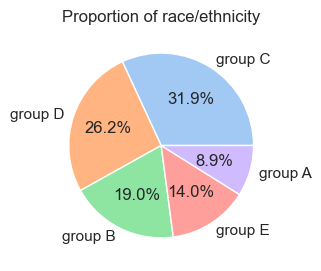

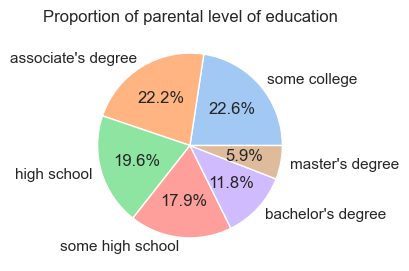

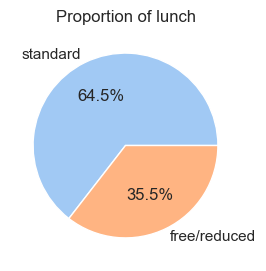

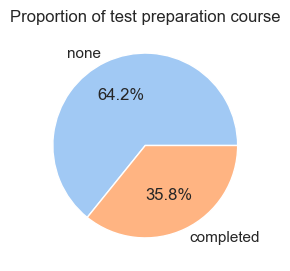

In [31]:
# Pie charts for each categorical feature
for col in cat_cols:
    plt.figure(figsize=(3, 3))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Proportion of {col}')
    plt.ylabel('')
    plt.show()


In [32]:
# 4. Check for Missing Values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})
missing_df

,Missing Values,Percentage
gender,0,0.0
race/ethnicity,0,0.0
parental level of education,0,0.0
lunch,0,0.0
test preparation course,0,0.0
math score,0,0.0
reading score,0,0.0
writing score,0,0.0


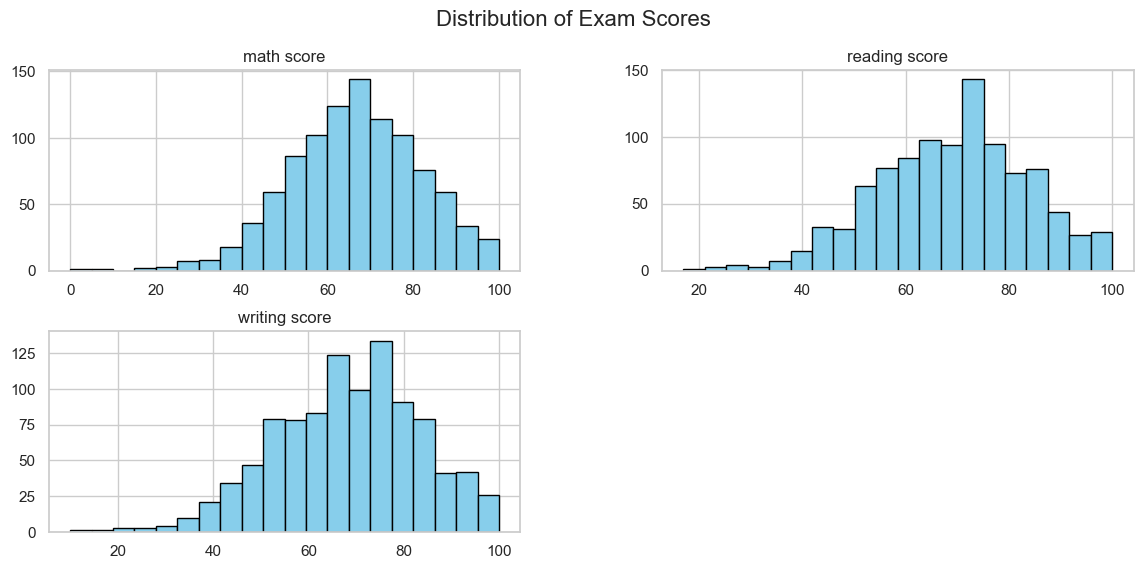

In [33]:
# 5. Data Distribution - Histograms
num_cols = ['math score', 'reading score', 'writing score']
df[num_cols].hist(bins=20, figsize=(14, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Exam Scores", fontsize=16)
plt.show()

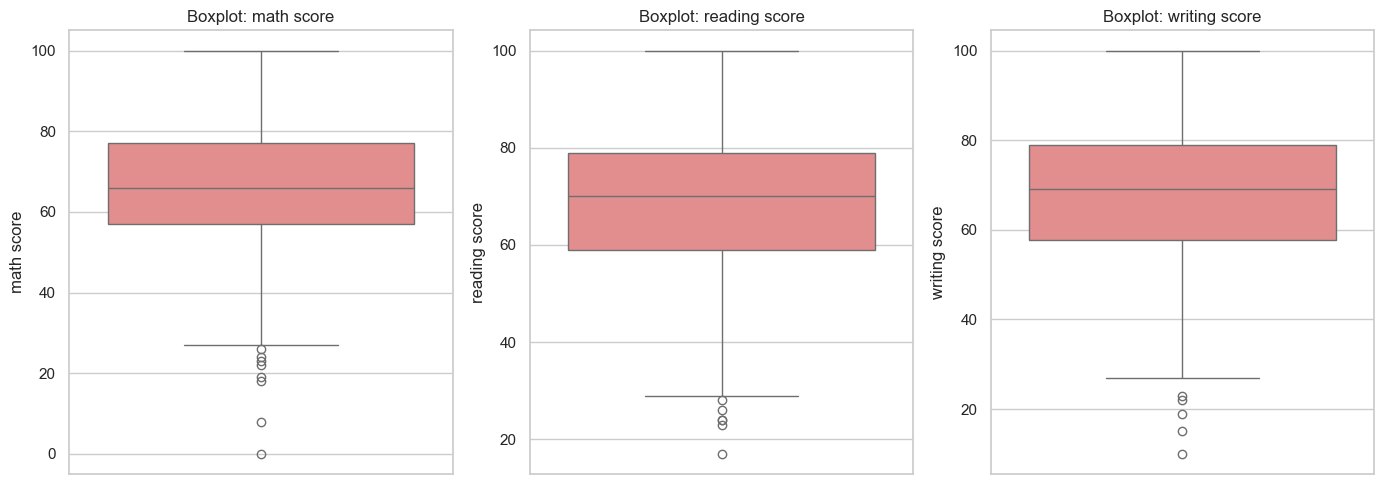

In [34]:
# 6. Boxplots for Outlier Detection
plt.figure(figsize=(14, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3037889670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='pastel')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3037889670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='pastel')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3037889670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='pastel')


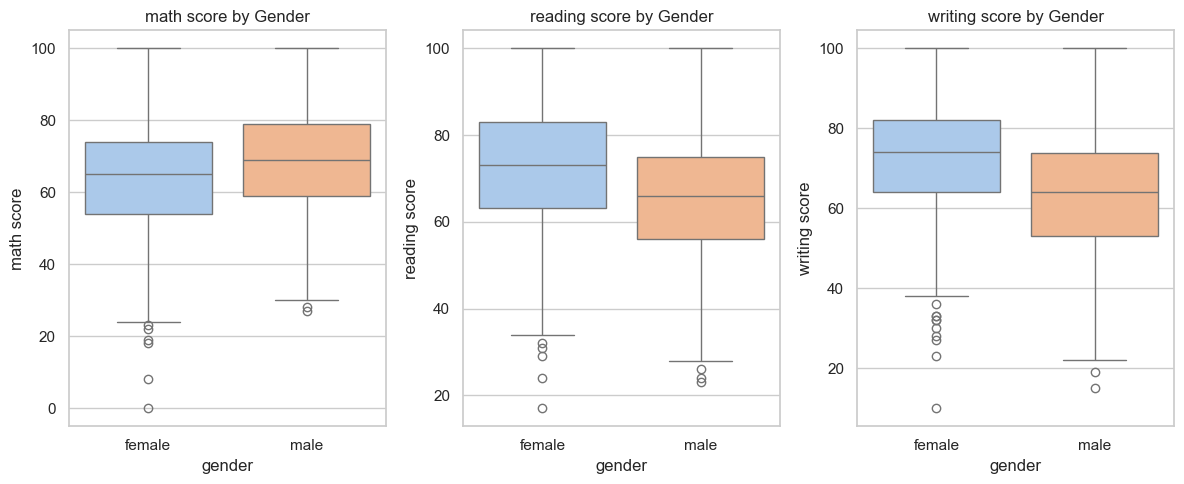

In [35]:
# 7. Score Comparison by Gender
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='gender', y=col, data=df, palette='pastel')
    plt.title(f'{col} by Gender')
plt.tight_layout()
plt.show()

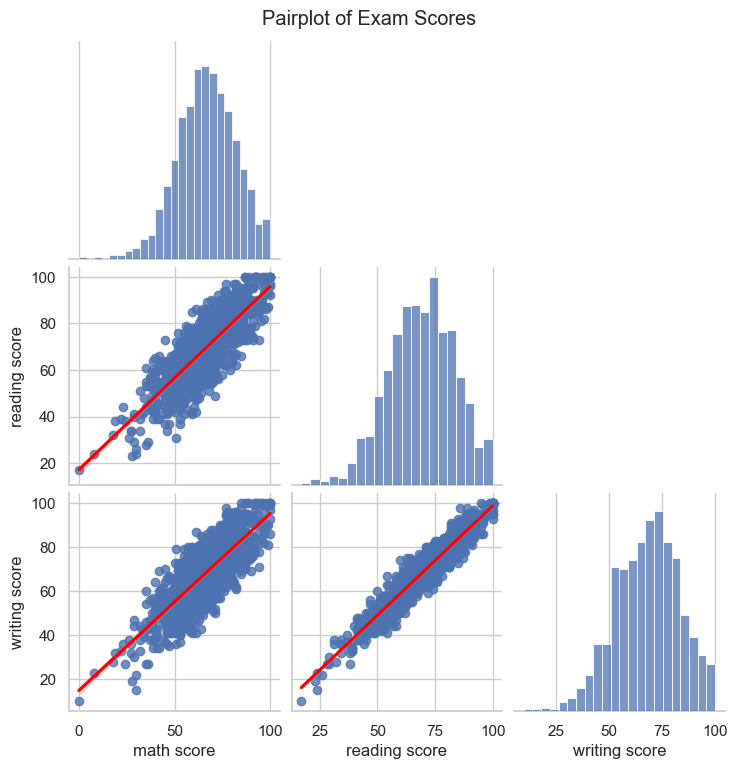

In [36]:
# 8. Pairplot for Score Correlation
sns.pairplot(df[num_cols], corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pairplot of Exam Scores", y=1.02)
plt.show()

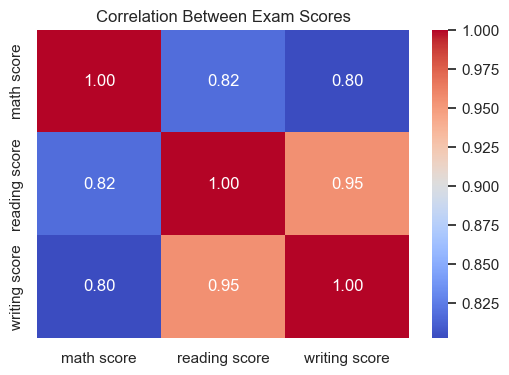

In [37]:
# 9. Correlation Heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Exam Scores")
plt.show()

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')


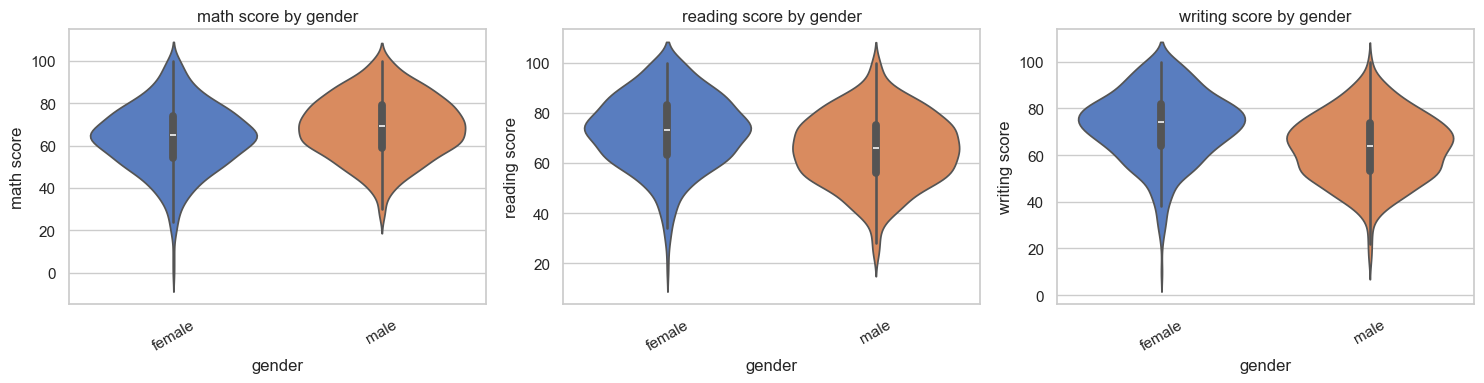

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')


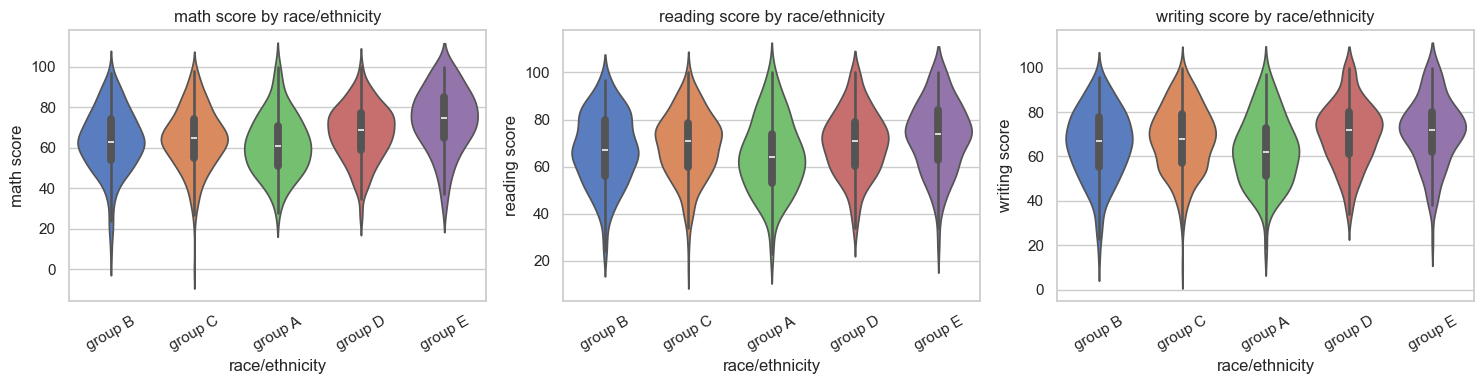

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')


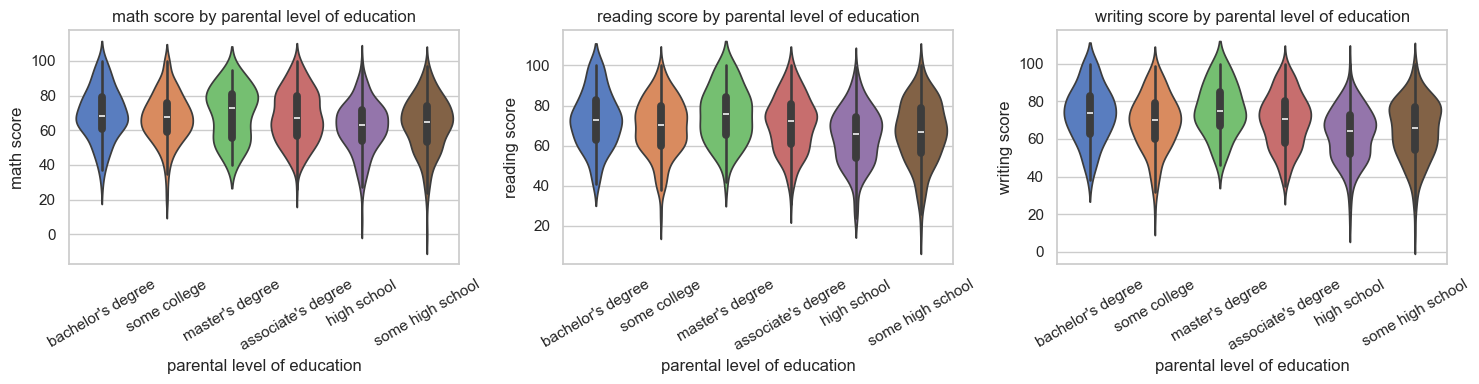

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')


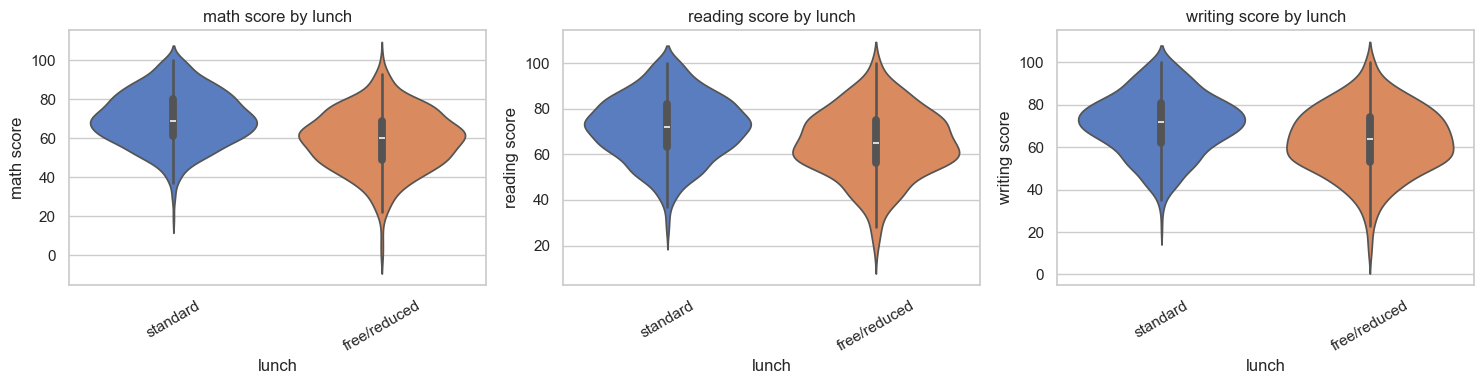

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\3894126034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat, y=score, data=df, palette='muted')


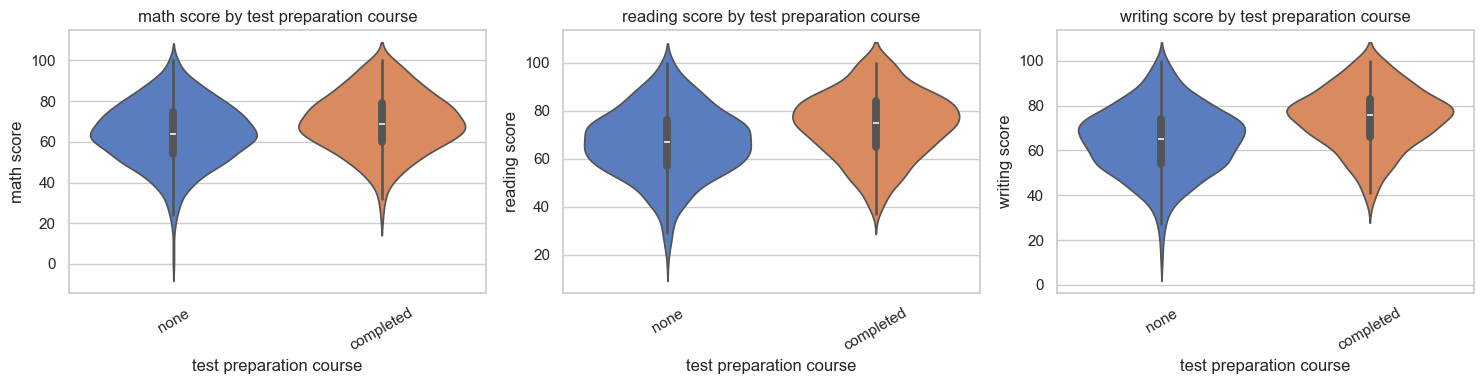

In [38]:
# 10. Violin Plots for Categorical vs Scores
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for cat in categorical_cols:
    plt.figure(figsize=(15, 4))
    for i, score in enumerate(num_cols, 1):
        plt.subplot(1, 3, i)
        sns.violinplot(x=cat, y=score, data=df, palette='muted')
        plt.xticks(rotation=30)
        plt.title(f'{score} by {cat}')
    plt.tight_layout()
    plt.show()

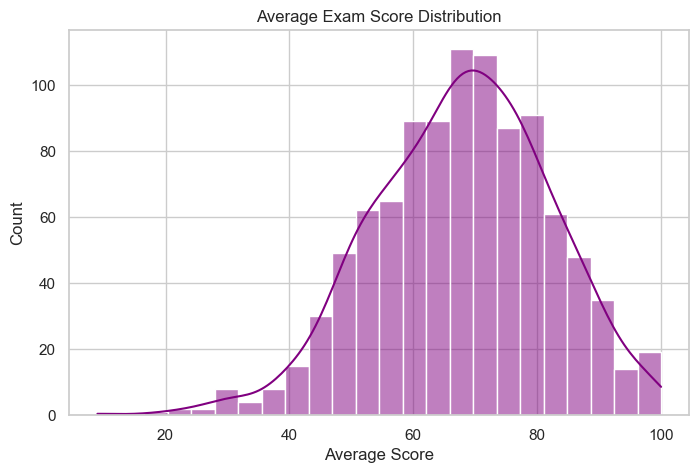

In [39]:
# 11. Average Score Column & Analysis
df['average score'] = df[num_cols].mean(axis=1)
plt.figure(figsize=(8, 5))
sns.histplot(df['average score'], kde=True, color='purple')
plt.title("Average Exam Score Distribution")
plt.xlabel("Average Score")
plt.ylabel("Count")
plt.show()

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\2384002831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='average score', data=df, palette='Set2')


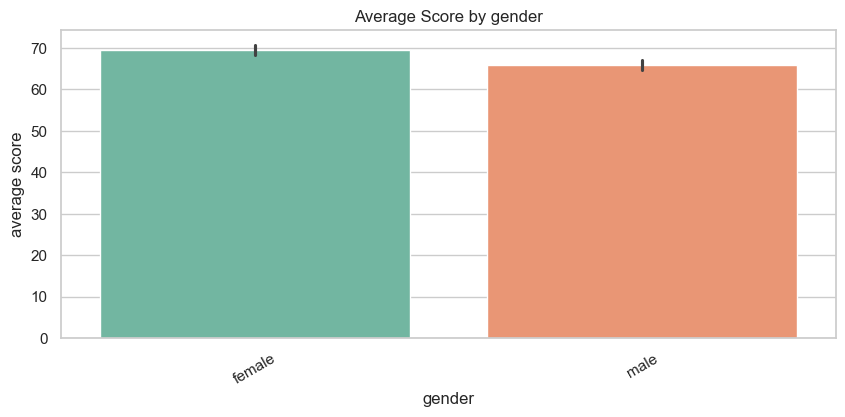

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\2384002831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='average score', data=df, palette='Set2')


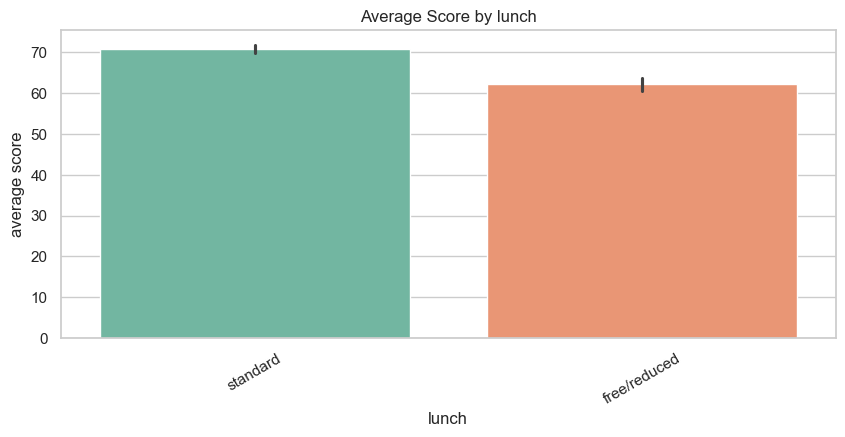

C:\Users\dhana\AppData\Local\Temp\ipykernel_34340\2384002831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='average score', data=df, palette='Set2')


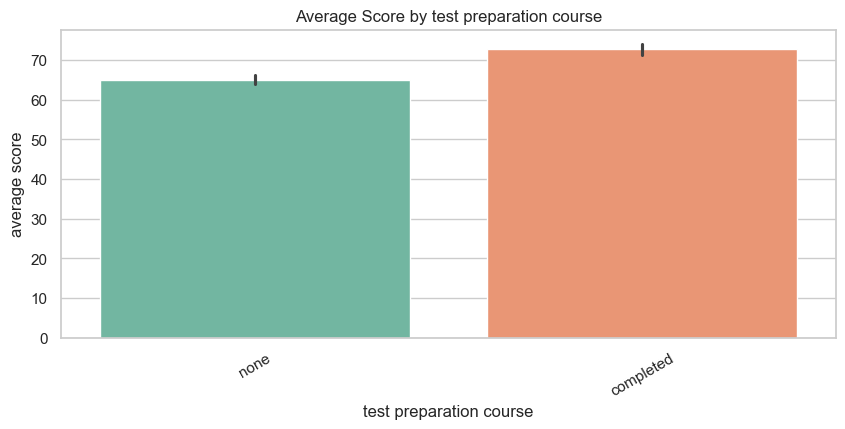

In [40]:
# 12. Grouped Means by Category
group_cols = ['gender', 'lunch', 'test preparation course']
for col in group_cols:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=col, y='average score', data=df, palette='Set2')
    plt.title(f"Average Score by {col}")
    plt.xticks(rotation=30)
    plt.show()